<a href="https://colab.research.google.com/github/navaneethkrishnap/Applied-Data-Science-Capstone---IBM/blob/main/5%20EDA%20With%20Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering




### Import Libraries and Define Auxiliary Functions


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory Data Analysis

In [5]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

df = pd.read_csv(URL)
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


### TASK 1: Visualize the relationship between Flight Number and Launch Site

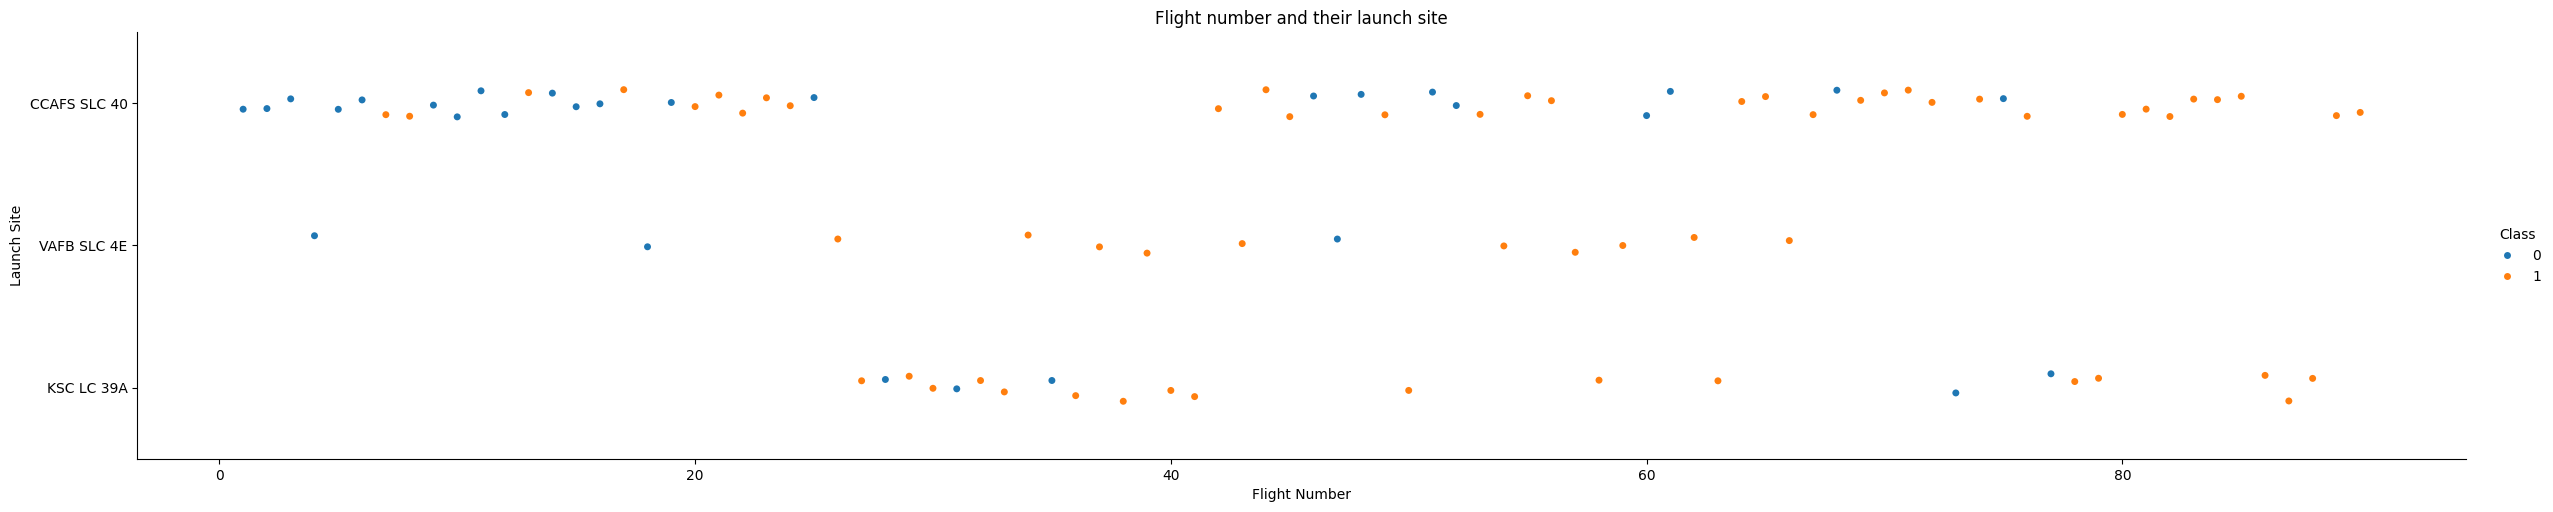

In [8]:
sns.catplot(x='FlightNumber',y='LaunchSite',hue='Class',data=df,aspect=5)
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.title('Flight number and their launch site')
plt.show()

# Explanation

- Newly launched flights has higher rate of success
- VAFB SLC 4E and KSC LC 39A have higher success rates than CCAFS SLS 40

### TASK 2: Visualize the relationship between Payload Mass and Launch Site


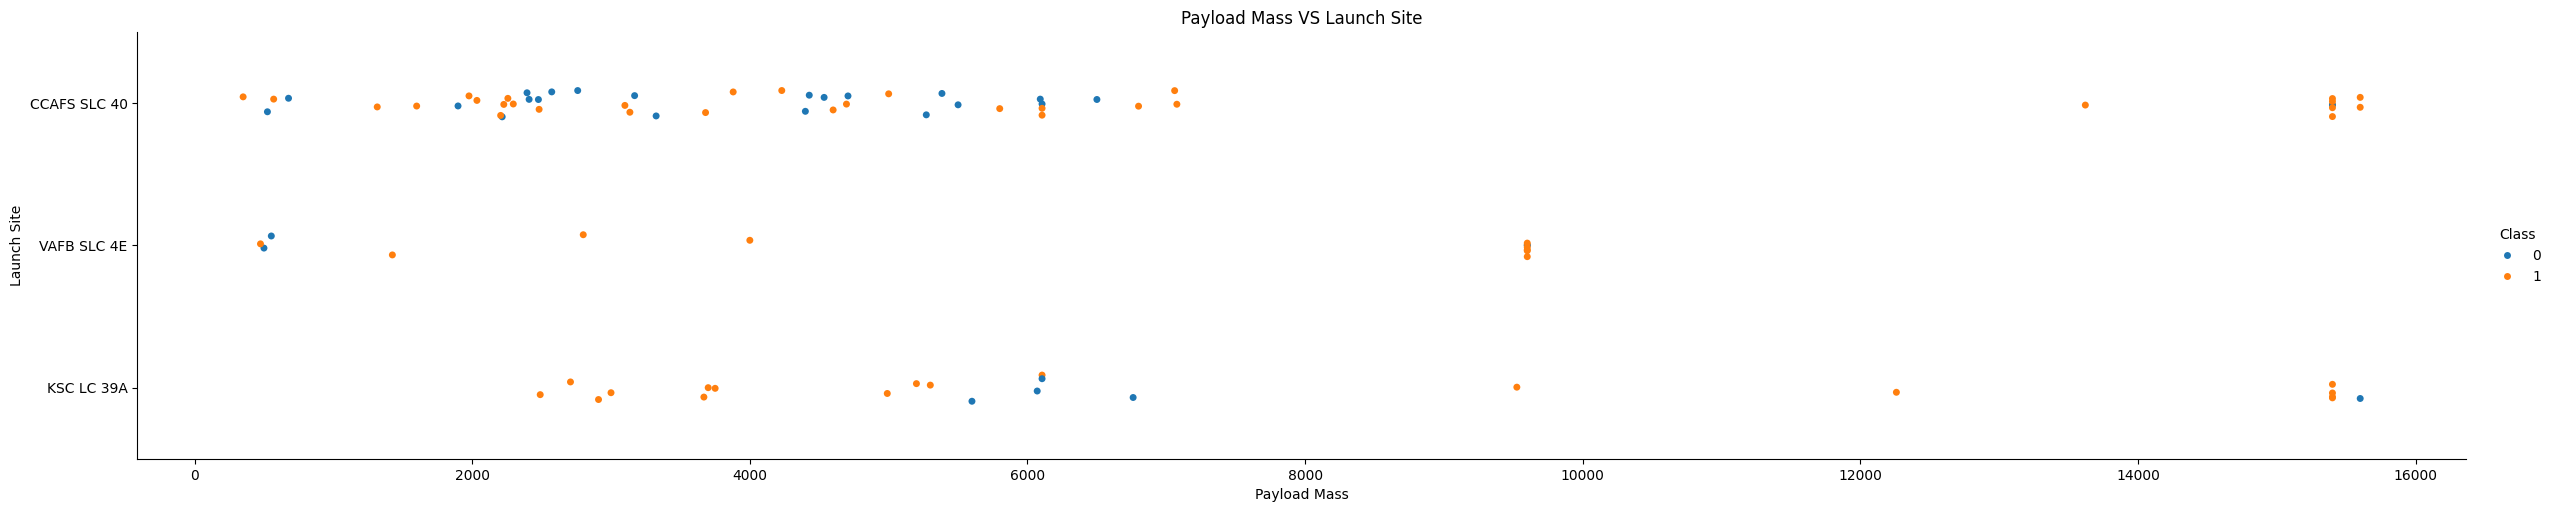

In [10]:
sns.catplot(x='PayloadMass',y='LaunchSite',data=df,hue='Class',aspect=5)
plt.xlabel('Payload Mass')
plt.ylabel('Launch Site')
plt.title('Payload Mass VS Launch Site')
plt.show()

### Explanation
- Higher the payload mass, the higher the rate of success as we can see payload mass with more than ~6500KG has only 1 failure observed.
- KSC LC 39A has recorded more success for less than 4000KG of Payload Mass.

### TASK  3: Visualize the relationship between success rate of each orbit type


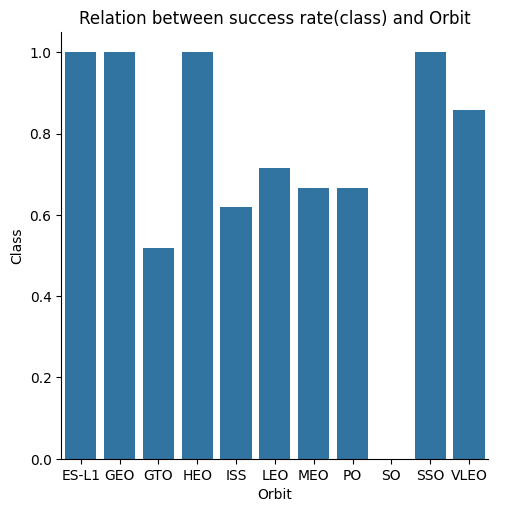

In [11]:
sns.catplot(x='Orbit',y='Class',data=df.groupby('Orbit')['Class'].mean().reset_index(),kind='bar')
plt.xlabel('Orbit')
plt.ylabel('Class')
plt.title('Relation between success rate(class) and Orbit')
plt.show()

### Explanation

1. Orbits with 1 probability Success Rate are ES-L1,GEO,HEO and SSO
2. Orbits with 0 probability Success Rate are SO
3. Orbits between 0.4 to 0.8 probablity of success are
GTO,ISS,MEO,PO and LEO.
4 Orbits between 0.8 to 0.9 probabilty of success are VLEO

### TASK  4: Visualize the relationship between FlightNumber and Orbit type

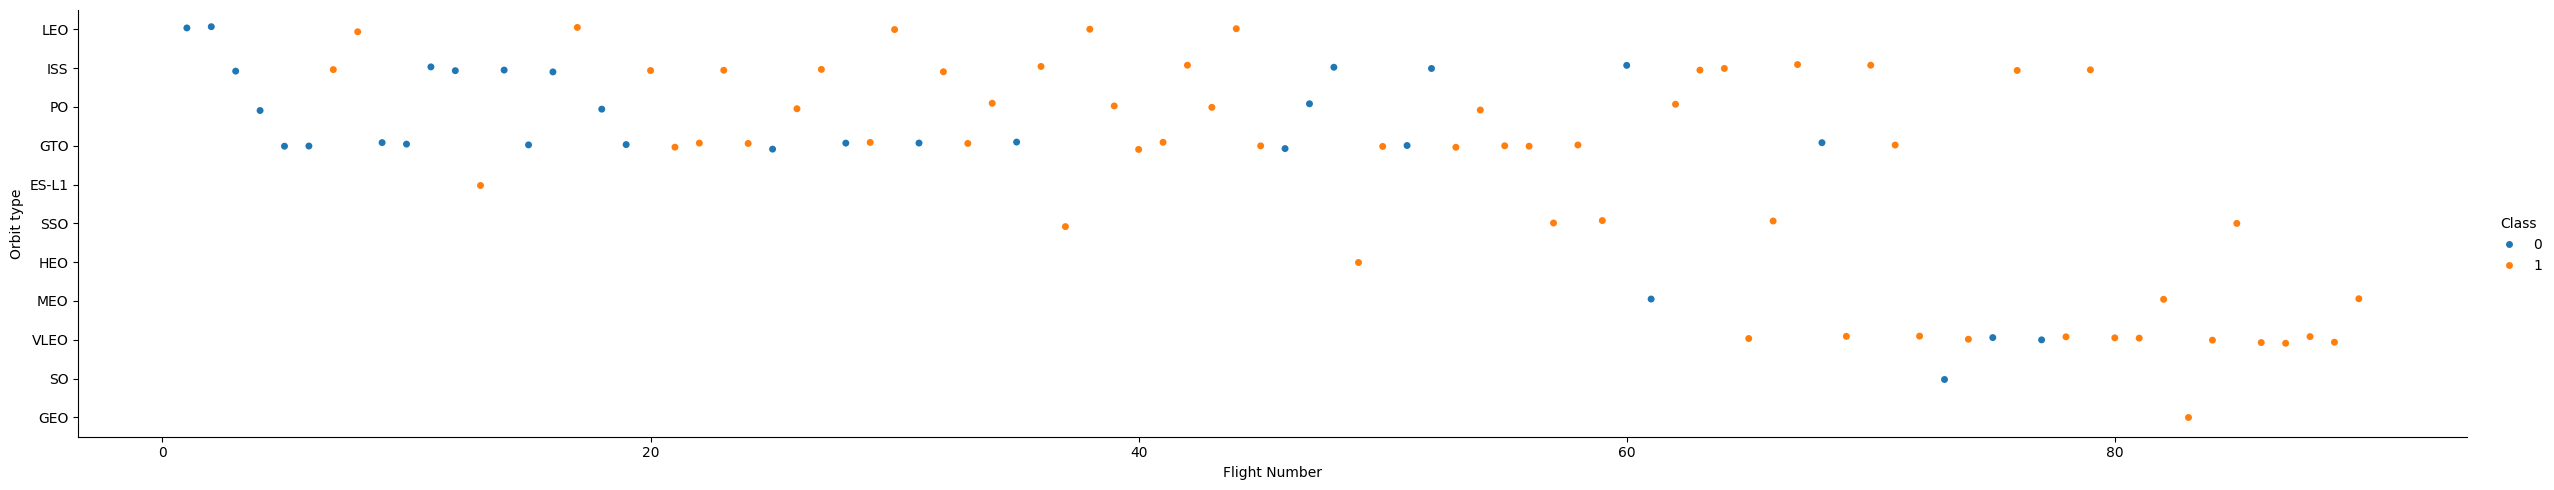

In [13]:
sns.catplot(x='FlightNumber',y='Orbit',data=df,hue='Class',aspect=5)
plt.xlabel('Flight Number')
plt.ylabel('Orbit type')
plt.show()

### Explanation
You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

### TASK  5: Visualize the relationship between Payload Mass and Orbit type


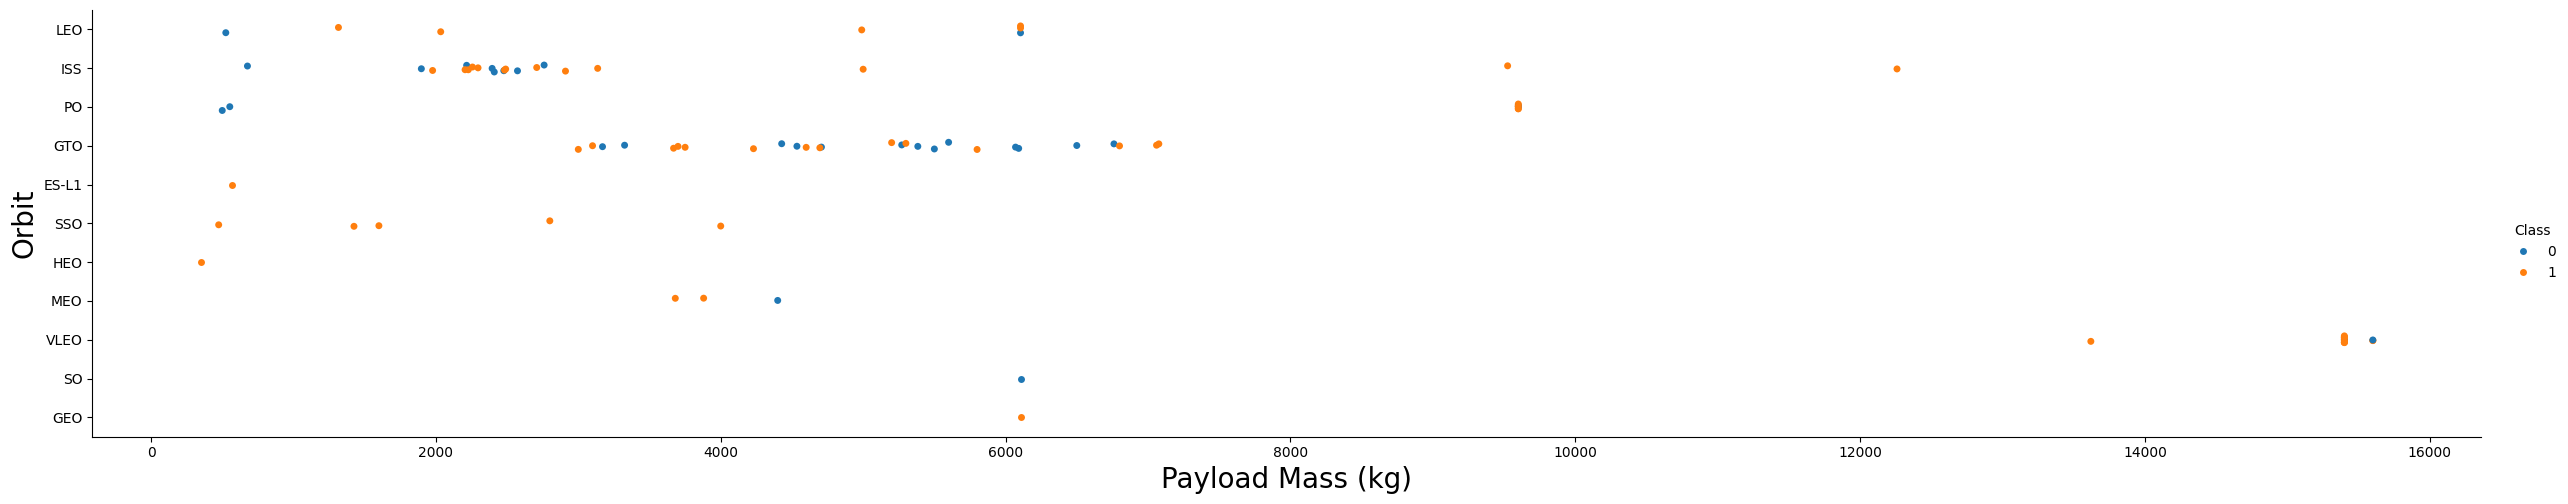

In [14]:
sns.catplot(x = 'PayloadMass', y = 'Orbit', hue = 'Class', data = df, aspect = 5)
plt.xlabel('Payload Mass (kg)', fontsize = 20)
plt.ylabel('Orbit', fontsize = 20)
plt.show()

### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.

In [22]:
# The function will help you get the year from the date:

year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


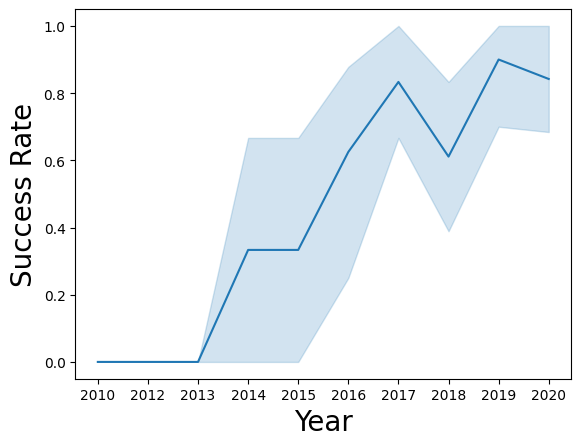

In [26]:
sns.lineplot(x = 'Date', y = 'Class',data=df)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Success Rate', fontsize = 20)
plt.show()

## Feature Engineering

In [27]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [36]:
features_one_hot = pd.get_dummies(features)
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers, cast the entire dataframe to variable type <code>float64</code>

In [37]:
features_one_hot.dtypes

,0
FlightNumber,int64
PayloadMass,float64
Flights,int64
GridFins,bool
Reused,bool
...,...
Serial_B1056,bool
Serial_B1058,bool
Serial_B1059,bool
Serial_B1060,bool


In [38]:
# casting to float
features_one_hot = features_one_hot.astype(float)
features_one_hot.dtypes

,0
FlightNumber,float64
PayloadMass,float64
Flights,float64
GridFins,float64
Reused,float64
...,...
Serial_B1056,float64
Serial_B1058,float64
Serial_B1059,float64
Serial_B1060,float64


In [32]:
# Export CSV
features_one_hot.to_csv('dataset_part_3.csv',index=False)